# Data Analysis Part Jara

Linking number of edit events since last passing tests to probability of unit tests passing

In [313]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import islice

# Import Data


In [264]:
editEvents = pd.read_csv("../data/df_edit.csv")
testEvents = pd.read_csv("../data/df_test.csv")

### Edit Events

In [265]:
print(f'No of edit events: {len(editEvents)}')
editEvents.tail()
allSessionID=editEvents.sessionID.unique()
print(f'no of sessions: {allSessionID.size} \n')

No of edit events: 497459
no of sessions: 2876 



In [266]:
editEvents["sessionID"].describe()

count                                   497459
unique                                    2876
top       8d0ea603-57cd-4b1f-b3cf-ce39ec9203c7
freq                                     17006
Name: sessionID, dtype: object

### Test Events

In [42]:
print(f'No of test events: {len(testEvents)}')
testEvents.head(5)

No of test events: 3826


,Unnamed: 0,sessionID,timestamp,totalTests,testsPassed
0,3197,006eb9aa-33f1-4e9e-8e74-7c978b58ee4a,2016-05-03 09:32:16,33,33
1,3320,03c83bf2-8938-4a8f-9f58-d52bf3b2eccd,2016-05-10 17:21:18,1,0
2,3321,03c83bf2-8938-4a8f-9f58-d52bf3b2eccd,2016-05-10 17:21:54,26,26
3,3322,03c83bf2-8938-4a8f-9f58-d52bf3b2eccd,2016-05-10 17:28:26,1,1
4,34,0504fbd1-cce2-4431-b4e2-edc63eea1c6d,2016-07-13 20:24:46,21,21


In [23]:
testEvents["sessionID"].describe()

count                                     3826
unique                                     275
top       3696281d-3432-4a49-aee6-207ded3ad6a8
freq                                       334
Name: sessionID, dtype: object

In [24]:
testEvents["totalTests"].describe()

count    3826.000000
mean       88.780972
std       430.785770
min        -1.000000
25%         1.000000
50%         3.000000
75%        21.000000
max      6618.000000
Name: totalTests, dtype: float64

In [25]:
testEvents["testsPassed"].describe()

count    3826.000000
mean       76.577627
std       392.217908
min        -1.000000
25%         0.000000
50%         1.000000
75%        15.000000
max      6090.000000
Name: testsPassed, dtype: float64

# Process Data

In [374]:
def get_passed_tests(sessionID):
    allTests = testEvents[(testEvents["sessionID"] == sessionID) 
                        & (testEvents["testsPassed"] > 0)]
    return np.asarray(allTests)


In [376]:
# counts the numbers of edits between a test and the next test
# for our purpose, be aware to only call it with passed tests
def get_nr_edits_between_tests(sessionID, timeFirstTest , timeNextTest):
    result = editEvents[(editEvents["timestamp"] < timeNextTest)
                                 & (editEvents["timestamp"] > timeFirstTest) 
                                 & (editEvents["sessionID"] == sessionID)]
    result = np.asarray(result)
    return len(result)


In [377]:
# number of rows for certain sessionID
print(editEvents.loc[editEvents['sessionID'] == '03c83bf2-8938-4a8f-9f58-d52bf3b2eccd'])

      Unnamed: 0                             sessionID            timestamp
7572      320761  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:17:02
7573      320762  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:17:05
7574      320763  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:17:08
7575      320764  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:17:11
7576      320765  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:17:13
...          ...                                   ...                  ...
7684      320873  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:35:06
7685      320874  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:35:13
7686      320875  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:35:15
7687      320876  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:35:19
7688      320877  03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:35:21

[117 rows x 3 columns]


In [378]:
get_nr_edits_between_tests('03c83bf2-8938-4a8f-9f58-d52bf3b2eccd', '2016-05-10 17:21:54', '2016-05-10 17:28:26')

39

In [379]:
# total nr sessionID that have a test that failed
print(f"failed tests: {testEvents.loc[testEvents['testsPassed'] == 0].count()}")

failed tests: Unnamed: 0     1260
sessionID      1260
timestamp      1260
totalTests     1260
testsPassed    1260
dtype: int64


In [380]:
def edits_from_pass_to_next_test(sessionID):
    result = []
    resultRow = []
    # get all passed tests of the session 
    allPassedTests = get_passed_tests(sessionID)

    numOfRows = np.size(allPassedTests, 0)
    # iterate over each passed test
    for p in range(numOfRows):
        timePass = allPassedTests[p][2]

        # no following test
        if p == numOfRows-1:
            hasNextTest = False
        else:
            hasNextTest = True
            timeTestNext = allPassedTests[p+1][2]
            resultNext = allPassedTests[p+1][4]

        # for each passed test, get nr of edits until next test
        if hasNextTest:
            nrOfEdits = get_nr_edits_between_tests(sessionID,timePass, timeTestNext)
            print(f'time of pass to append: {timePass}')
            print(f'nr of edits: {nrOfEdits}')
            print(f'result next: {resultNext} \n')
            result.append([sessionID, timePass, timeTestNext, nrOfEdits, resultNext])
            
    return result


In [408]:
result = edits_from_pass_to_next_test('03c83bf2-8938-4a8f-9f58-d52bf3b2eccd')

time of pass to append: 2016-05-10 17:21:54
nr of edits: 39
result next: 1 



In [481]:
def create_df(resultArray):
    print(f'Length result: {len(resultArray)} \n\n')

    # Create DataFrame
    column_labels = ['sessionID','timePass','timeNext', 'editsUntilNextTest', 'testResultNext', 'booleanNextTest']
    df = pd.DataFrame(resultArray, columns=column_labels)

    # Print the output.
    print(df.head(20))


## Iterate over all sessions and create df

In [505]:
def get_result_array():
    sessionWithPassedTests=0
    sessionWithoutPassedTests=0
    sessionWithPassedTestsButNoNextTest=0
    result=[]
    print(f'time before loop: {datetime.now(tz=None)} \n')
    for index, row in testEvents.iterrows():
        if(row["testsPassed"] > 0):
            sessionWithPassedTests+=1
            #has next test
            if((index+1 < len(testEvents)) and (testEvents.iloc[index+1].sessionID == row["sessionID"])):
                item=[]
                timestampNext=testEvents.iloc[index+1].timestamp
                resultTestNext=testEvents.iloc[index+1].testsPassed
                nrOfEdits=get_nr_edits_between_tests(row["sessionID"], row["timestamp"], timestampNext)
                if(resultTestNext == 0):
                    resultTestNextBoolean = 0
                else:
                    resultTestNextBoolean = 1
                item.append(row["sessionID"])
                item.append(row["timestamp"])
                item.append(timestampNext)
                item.append(nrOfEdits)
                item.append(resultTestNext)
                item.append(resultTestNextBoolean)
                result.append(item)
            else:
                sessionWithPassedTestsButNoNextTest+=1
        else:
            sessionWithoutPassedTests+=1
    print(f'with passed: {sessionWithPassedTests}')
    print(f'with passed test but no next test: {sessionWithPassedTestsButNoNextTest}')
    print(f'without passed test: {sessionWithoutPassedTests}')
    print(f'total: {sessionWithoutPassedTests+sessionWithPassedTests}')
    # Create DataFrame
    create_df(result)
    print(f'time after loop and df: {datetime.now(tz=None)} \n')
    
    return result   


In [506]:
result_array = get_result_array()


time before loop: 2020-04-28 16:22:58.290735 

with passed: 2565
with passed test but no next test: 208
without passed test: 1261
total: 3826
Length result: 2357 


                               sessionID             timePass  \
0   03c83bf2-8938-4a8f-9f58-d52bf3b2eccd  2016-05-10 17:21:54   
1   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:49:28   
2   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:51:53   
3   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:53:04   
4   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:53:20   
5   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:53:27   
6   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:53:55   
7   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:54:54   
8   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:55:50   
9   068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 18:57:15   
10  068370ce-c891-45d8-8255-8c9ea63f3b43  2016-07-13 19:02:13   
11  06ed56fc-0467-4b01-8c7b-f2ffe300ff0e  2016-08-19 11

# Model

0
21
1
no of failed tests 0
no of passed tests 2330


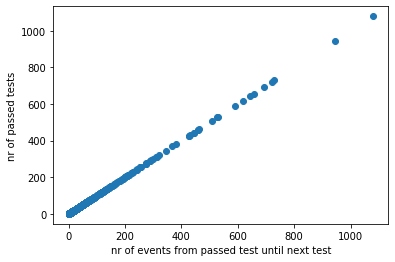

In [140]:
nrOfEvents = []
testResults = []
testResultsBoolean = []

for i in range(len(result_array)):
    nrOfEvents.append(result_array[i][3])
    testResults.append(result_array[i][4])
    if result_array[i][4] == 0:
        print('append 0')
        testResultsBoolean.append(0)
    else:
        testResultsBoolean.append(1)
        
    

#TODO: we dont want nr of passed tests, but YES NO = if next test passed or not!!
 
print(nrOfEvents[4])
print(testResults[4])
print(testResultsBoolean[4])

failedTests = testResultsBoolean
# TODO: check if no of failed tests is true
print(f'no of failed tests {testResultsBoolean.count(0)}')
print(f'no of passed tests {testResultsBoolean.count(1)}')


#plt.plot(nrOfEvents,testResult)

plt.scatter(nrOfEvents, nrOfEvents)
plt.xlabel('nr of events from passed test until next test')
plt.ylabel('nr of passed tests')
plt.show()



#model = np.polyfit(nrOfEvents, testResult, 1)
#model

from sklearn.metrics import r2_score
#predict = np.poly1d(model)
#r2_score(passes, predict(times))